# Transforms Overview

An overview over all available transforms.

In [1]:
import matplotlib.pyplot as plt
import os

import sys
sys.path.append("..")
from training.data.data_api import *

In [2]:
# utility function that picks an axial plane and plots it
def axshow(item: dict, axpos=100):
    plt.imshow(item["img"].T[axpos])

## Transforms
Transforms are callable classes that are applied to dicts of data. A transform usually works on a given key of the dict and returns a new dict that can be passed to the next transform.

This allows us to propagate metadata through the data pipeline while keeping a modular design.

Transforms should inherit from `BaseTransform`.

In [3]:
# transforms expect dicts as their argument to __call__
item = {
    "path": os.path.expanduser("~/data/stoic/data/data/mha/10010.mha"),
    "inf": 1,
    "sev": 0,
}

### LoadMha
Requires `path` key and adds `img`, `age`, and `sex` keys

(512, 512, 454) 85 F


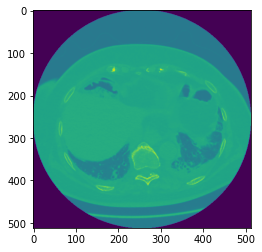

In [4]:
tfm_mha = LoadMha(metadata=True)
loaded = tfm_mha(item)
print(loaded["img"].shape, loaded["age"], loaded["sex"])
axshow(loaded)

### ScaleClip

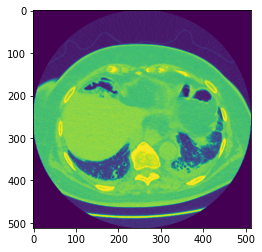

In [5]:
tfm_scale = ScaleClip(-1100, 300)
scaled = tfm_scale(loaded)
axshow(scaled)

### Zoom

(256, 256, 128)


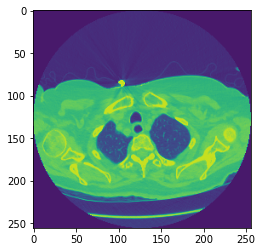

In [6]:
tfm_zoom = Zoom((256, 256, 128))
zoomed = tfm_zoom(scaled)
axshow(zoomed)
print(zoomed["img"].shape)

### Slice2D

(3, 512, 512)


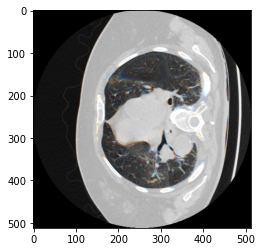

In [7]:
tfm_slice2d = Slice2D(0.45, 0.6)
sliced = tfm_slice2d(scaled)
print(sliced["img"].shape)
plt.imshow(sliced["img"].T)

### EncodeSex

In [8]:
tfm_encode_sex = EncodeSex()
encoded_sex = tfm_encode_sex(loaded)
print("before:", loaded["sex"])
print("after:", encoded_sex["sex"])

before: F
after: tensor([1, 0, 0])


### Gaussian Filter

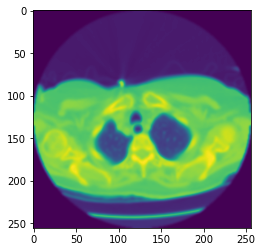

In [9]:
tfm_gauss_smooth = GaussianFilter(sigma_range=(1, 3))
smoothed = tfm_gauss_smooth(zoomed)
axshow(smoothed)

### Gaussian Sharpen

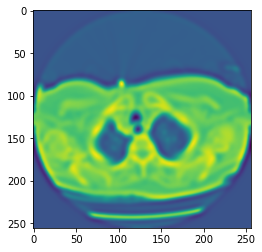

In [10]:
tfm_sharpen = GaussianSharpen(
    sigma1_range=(3,3),
    sigma2_range=(1,1),
    alpha_range=(30, 30))
sharpened = tfm_sharpen(zoomed)
axshow(sharpened)

### Crop

In [11]:
zoomed["img"].shape

(256, 256, 128)

(128, 128, 128)


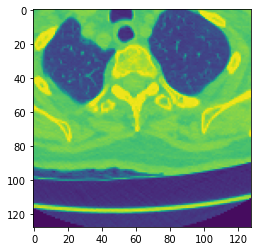

In [12]:
tfm_crop = Crop((128, 128, 128))
cropped = tfm_crop(zoomed)
print(cropped["img"].shape)
axshow(cropped)

### Rotate

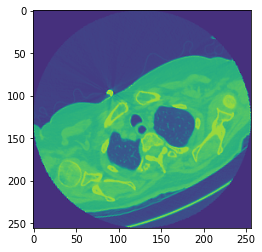

In [13]:
tfm_rotate = Rotate((-45, 45))
rotated = tfm_rotate(zoomed)
axshow(rotated)

### Add Noise

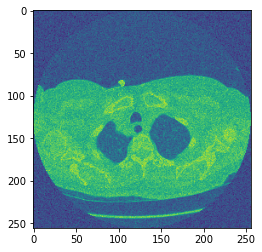

In [14]:
tfm_noise = AddNoise(mean_range=(0.5, 0.5), std_range=(0.1, 0.1))
noised = tfm_noise(zoomed)
axshow(noised)

### Axial Flip

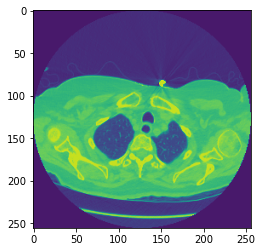

In [15]:
tfm_flip = AxialFlip()
# use Rand() to apply the flip with random probability:
tfm_flip_rand = Rand(AxialFlip())
flipped = tfm_flip(zoomed)
axshow(flipped)

### Lambda
Apply arbitrary function

In [16]:
def norm_age(age):
    return age / 85.0
tfm_age = Lambda(norm_age, key="age", cachable=True)
aged = tfm_age(loaded)
print("before:", loaded["age"])
print("after:", aged["age"])

before: 85
after: 1.0


### Select
The only transform that does not return a dict. Should be the last transform of a dataset to output the desired format.

In [17]:
tfm_select = Select("sev", "inf", "sex")
selected = tfm_select(loaded)
print(selected)

(0, 1, 'F')
